In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris=load_iris()
X=iris.data
y=iris.target
target_names=iris.target_names

In [ ]:
X_scaled=StandardScaler().fit_transform(X)

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
pca_df=pd.DataFrame(data=X_pca,columns=["PC1","PC2"])
pca_df["target"]=y

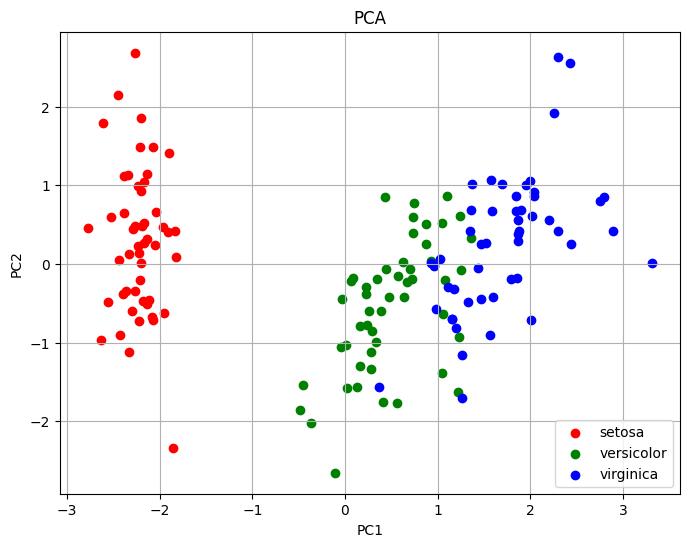

Total explained variance: [0.72962445 0.22850762]


In [ ]:
colors=["r","g","b"]
plt.figure(figsize=(8,6))
for i,color,labels in zip([0,1,2],colors,target_names):
  plt.scatter(pca_df.loc[pca_df["target"]==i,"PC1"],pca_df.loc[pca_df["target"]==i,"PC2"],c=color,label=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()
print("Total explained variance:",pca.explained_variance_ratio_)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
water_potability=pd.read_csv("/content/Water Portability.csv")
water_potability.shape

(3276, 10)

In [ ]:
X=water_potability.drop("Potability",axis=1)
y=water_potability["Potability"]

In [ ]:
X.dropna(inplace=True)

In [ ]:
target_names=["Not Potable","Potable"]

In [ ]:
X_scaled=StandardScaler().fit_transform(X)

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
9849168980

In [ ]:
pca_df=pd.DataFrame(data=X_pca,columns=["PC1","PC2"])
pca_df["target"]=y

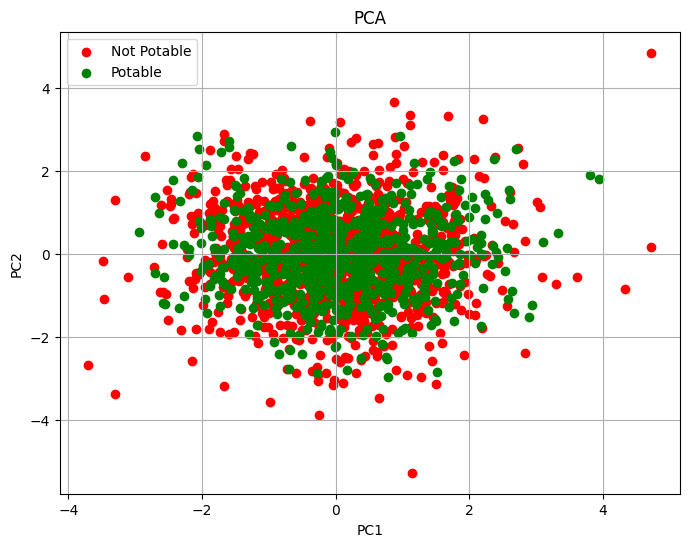

Total explained variance: [0.13410812 0.13005308]


In [ ]:
colors=["r","g","b"]
plt.figure(figsize=(8,6))
for i,color,labels in zip([0,1,2],colors,target_names):
  plt.scatter(pca_df.loc[pca_df["target"]==i,"PC1"],pca_df.loc[pca_df["target"]==i,"PC2"],c=color,label=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()
print("Total explained variance:",pca.explained_variance_ratio_)


In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=257f8fa329c42d04d5edd399e80fb3e6b9d8ae5713b4e0e4ca00de9d078410a1
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


chisquare value:775.2658089835436,p_value:4.37202683677244e-109
kmo value:0.732695804409928
ev values:[3.30147528 1.57216477 1.23202899 1.20663891 1.02202905 0.97016841
 0.86323471 0.7760929  0.72919471 0.62272074 0.53440229 0.43003362
 0.37187613 0.36793946]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


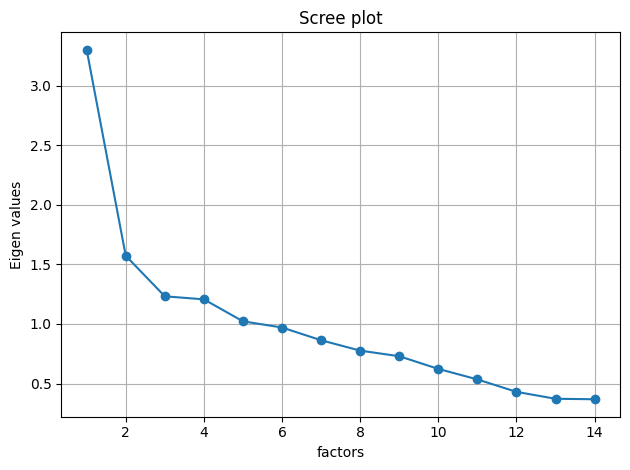

In [ ]:
chisquare_value,p_value=calculate_bartlett_sphericity(data)
print(f"chisquare value:{chisquare_value},p_value:{p_value}")
kmo_all,kmo_model=calculate_kmo(data)
print(f"kmo value:{kmo_model}")
fa=FactorAnalyzer(rotation=None)
fa.fit(data)
ev,_=fa.get_eigenvalues()
print(f"ev values:{ev}")
plt.plot(range(1,len(ev)+1),ev,marker='o')
plt.xlabel("factors")
plt.ylabel("Eigen values")
plt.title("Scree plot")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
fa=FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(data)
loadings=pd.DataFrame(fa.loadings_,index=data.columns)
print(loadings)

                 0         1         2         3
age      -0.188249 -0.135859  0.595996 -0.258796
sex      -0.150216 -0.010495  0.005651  0.646745
cp        0.694566  0.025198  0.104132  0.068265
trestbps  0.024752 -0.121766  0.433995 -0.046561
chol     -0.122204  0.043937  0.247556 -0.246448
fbs       0.096480 -0.024631  0.295377  0.075384
restecg   0.069081  0.036911 -0.212078 -0.013722
thalach   0.457308  0.363958 -0.187777  0.095110
exang    -0.537900 -0.230501  0.027379  0.064154
oldpeak  -0.260014 -0.597486  0.219641  0.107096
slope     0.133175  0.865454 -0.075000 -0.010743
ca       -0.297060 -0.026850  0.381913  0.130528
thal     -0.296365 -0.066891  0.120774  0.230944
target    0.683917  0.256246 -0.292085 -0.298161


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [ ]:
data=pd.read_csv("/content/Water Portability.csv",nrows=200)


In [ ]:
#data=data.drop("Potability",axis=1)
data=data.select_dtypes(include='float')

In [ ]:
data.dropna(inplace=True)

In [ ]:
dist_matrix=pairwise_distances(data,metric="euclidean")

In [ ]:
mds=MDS(n_components=2,dissimilarity="precomputed",random_state=42)
mds_coords=mds.fit_transform(dist_matrix)

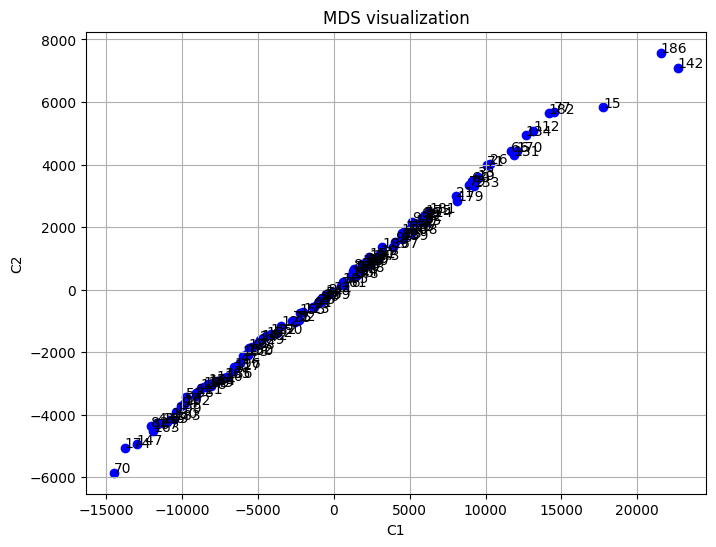

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(mds_coords[:,0],mds_coords[:,1],color="blue")
for i,label in enumerate(data.index):
  plt.text(mds_coords[i,0]+0.2,mds_coords[i,1],label)
plt.title("MDS visualization")
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()

In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=48957613cab6a4ab2915f623ed47d6a4bbb3109312988f428664840b49fc6611
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
import pandas as pd
from semopy import Model,semplot

In [ ]:
data=pd.read_csv("/content/bankloan.csv")

In [ ]:
data.head()

,Income,CreditScore,LoanAmount,EmploymentStatus,LoanEligibilityScore
0,40000,600,10000,1,50
1,50000,650,15000,1,55
2,60000,700,20000,1,60
3,80000,750,25000,0,65
4,100000,800,30000,1,70


In [ ]:
model_desc="""
LoanEligibilityScore~Income+CreditScore+EmploymentStatus
LoanAmount~CreditScore
"""

In [ ]:
model=Model(model_desc)
model.fit(data)

SolverResult(fun=np.float64(2.5798546739149195), success=True, n_it=35, x=array([ 3.16598368e-05,  8.51409408e-02, -8.87436271e-02,  9.90041860e+01,
        6.56250000e+07,  2.41372502e+00]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [ ]:
estimates=model.inspect()
print("estimates",estimates)

estimates                    lval  op                  rval      Estimate      Std. Err  \
0  LoanEligibilityScore   ~                Income  3.165984e-05  4.142140e-05   
1  LoanEligibilityScore   ~           CreditScore  8.514094e-02  1.854251e-02   
2  LoanEligibilityScore   ~      EmploymentStatus -8.874363e-02  1.318210e+00   
3            LoanAmount   ~           CreditScore  9.900419e+01  2.500000e+01   
4            LoanAmount  ~~            LoanAmount  6.562500e+07  3.281250e+07   
5  LoanEligibilityScore  ~~  LoanEligibilityScore  2.413725e+00  1.206863e+00   

    z-value   p-value  
0  0.764335  0.444667  
1  4.591662  0.000004  
2 -0.067321  0.946326  
3  3.960167  0.000075  
4  2.000000  0.045500  
5  2.000000  0.045500  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
x,_=make_blobs(n_samples=100,centers=3,cluster_std=0.60,random_state=0)

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

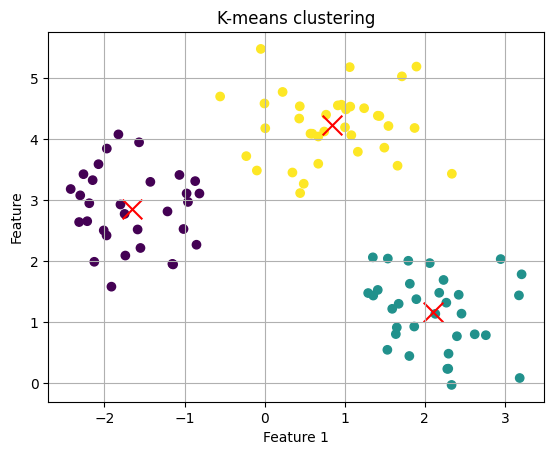

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],s=200,c="red",marker="x")
plt.title("K-means clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

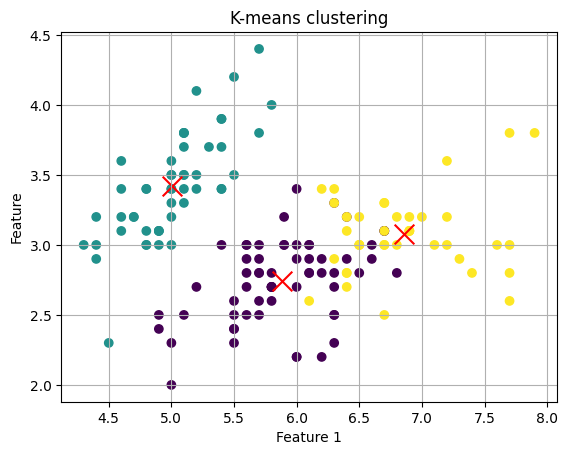

In [ ]:
x=pd.read_csv("/content/IRIS.csv").drop("species",axis=1)
x=x.values
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=labels,cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],s=200,c="red",marker="x")
plt.title("K-means clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
x,_=make_moons(n_samples=300,noise=0.05,random_state=0)
#x=pd.read_csv("/content/Water Portability.csv").drop("Potability",axis=1)
#x.dropna(inplace=True)
#x=x.values

In [ ]:
db=DBSCAN(eps=0.2,min_samples=5)
labels=db.fit_predict(x)

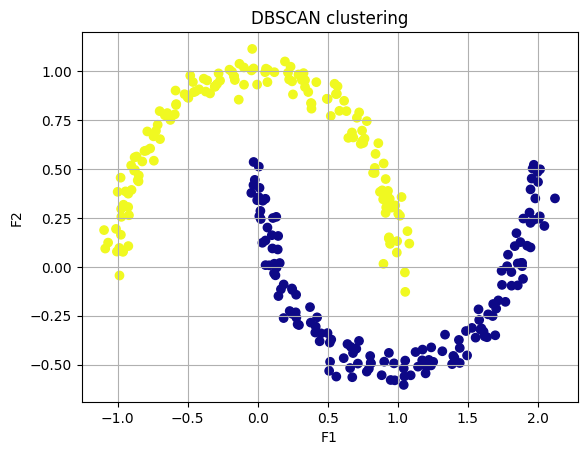

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap="plasma")
plt.title("DBSCAN clustering")
plt.xlabel("F1")
plt.ylabel("F2")
plt.grid(True)
plt.show()

In [ ]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
noise=list(labels).count(-1)
print(f"Estimated number of clusters:{n_clusters}")
print(f"Estimated number of noise points:{noise}")

Estimated number of clusters:2
Estimated number of noise points:0


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
iris=load_iris()
X=iris.data
y=iris.target
#data=pd.read_csv("/content/Water Portability.csv",nrows=500)
#X=data.drop("Potability",axis=1)
#y=data["Potability"]

In [ ]:
list(data.columns)
data.shape

(500, 10)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
model=DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

accuracy: 0.9777777777777777
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



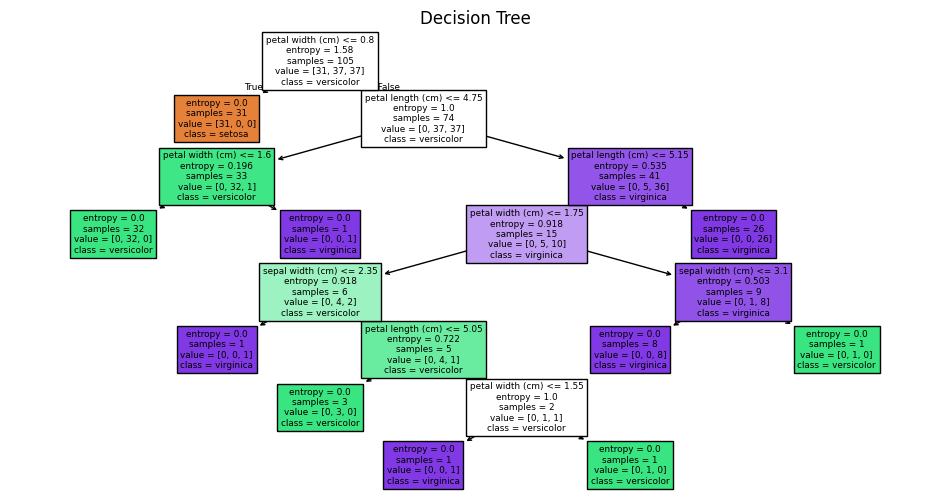

In [ ]:
plt.figure(figsize=(12,6))
plot_tree(model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.xlabel("Features")
plt.ylabel("class")
plt.title("Decision Tree")
plt.show()

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules

In [ ]:
transactions = [
['milk', 'bread', 'eggs'],
['milk', 'bread'],
['milk', 'eggs'],
['bread', 'eggs'],
['milk', 'bread', 'eggs'],
['bread']
]

In [ ]:
te=TransactionEncoder()
te_data=te.fit_transform(transactions)


In [ ]:
df=pd.DataFrame(te_data,columns=te.columns_)

In [ ]:
frequent_itemsets=fpgrowth(df,min_support=0.4,use_colnames=True)

In [ ]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)

In [ ]:
print("fpgrowth:",frequent_itemsets)
print("association rules:",rules)
print(rules[["antecedents","consequents","support","confidence","lift"]])

fpgrowth:     support       itemsets
0  0.833333        (bread)
1  0.666667         (milk)
2  0.666667         (eggs)
3  0.500000  (milk, bread)
4  0.500000   (eggs, milk)
5  0.500000  (eggs, bread)
association rules:   antecedents consequents  antecedent support  consequent support  support  \
0      (milk)     (bread)            0.666667            0.833333      0.5   
1      (eggs)      (milk)            0.666667            0.666667      0.5   
2      (milk)      (eggs)            0.666667            0.666667      0.5   
3      (eggs)     (bread)            0.666667            0.833333      0.5   

   confidence   lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  0.900               1.0 -0.055556    0.666667      -0.250000   
1        0.75  1.125               1.0  0.055556    1.333333       0.333333   
2        0.75  1.125               1.0  0.055556    1.333333       0.333333   
3        0.75  0.900               1.0 -0.055556    0.666667      -0.250000

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [ ]:
df=pd.read_csv("/content/Water Portability.csv")
df.head()
df.dropna(inplace=True)

In [ ]:
for cat in df.select_dtypes(include="object").columns:
  df[cat]=LabelEncoder().fit_transform(df[cat])

In [ ]:
X=df.drop("Potability",axis=1)
y=df["Potability"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#model=LogisticRegression()
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("accuracy:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

accuracy: 0.6228287841191067
confusion matrix:
 [[209  22]
 [130  42]]
classification report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.73       231
           1       0.66      0.24      0.36       172

    accuracy                           0.62       403
   macro avg       0.64      0.57      0.54       403
weighted avg       0.63      0.62      0.57       403

